<a href="https://colab.research.google.com/github/Kunamathrusri/personalized-health-nudges/blob/main/Minor3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

comb_df=pd.read_csv('/content/sample_data/datasets/final_combined_health_dataset.csv')

In [ ]:
comb_df.head()

,age,sleep_duration,sleep_quality,stress_level,activity_minutes,steps,screen_time,mental_health_score
0,27.0,6.1,6.0,6.0,42.0,4200.0,6.61,Poor
1,28.0,6.2,6.0,8.0,60.0,10000.0,12.16,Fair
2,28.0,6.2,6.0,8.0,60.0,10000.0,11.08,Fair
3,28.0,5.9,4.0,8.0,30.0,3000.0,7.08,Good
4,28.0,5.9,4.0,8.0,30.0,3000.0,2.92,Poor


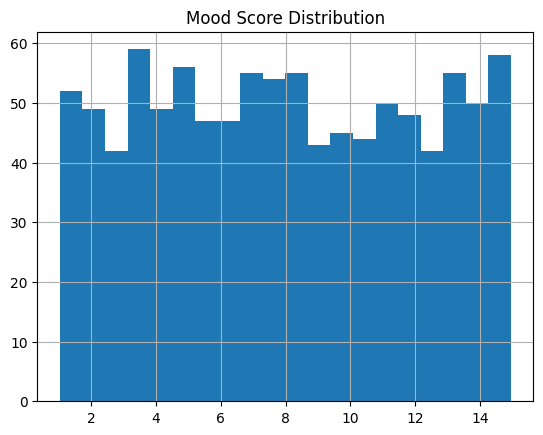

In [ ]:
import matplotlib.pyplot as plt
comb_df['screen_time'].hist(bins=20)
plt.title("Mood Score Distribution")
plt.show()

In [ ]:
mental_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}
comb_df['mental_health_score'] = comb_df['mental_health_score'].map(mental_health_mapping)

In [ ]:
#Behavioral Risk Classifier (Classification)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def is_excessive_screen_time(row):
    age = row['age']
    screen_time = row['screen_time']

    if 1 <= age <= 7:
        return screen_time > 2
    elif 8 <= age <= 15:
        return screen_time > 3
    else:
        return screen_time > 4.5

# Apply the function to get excessive screen time flags
comb_df['excessive_screen_time'] = comb_df.apply(is_excessive_screen_time, axis=1)

# Update risky_behavior definition
comb_df['risky_behavior'] = (
    (comb_df['stress_level'] > 7) |
    (comb_df['mental_health_score'] < 1) |
    (comb_df['sleep_quality'] < 4) |
    (comb_df['excessive_screen_time'] == True)
)


# Define your features and target
X = comb_df[[ 'steps', 'stress_level','sleep_duration', 'sleep_quality', 'activity_minutes', 'screen_time']]
y = comb_df['risky_behavior']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
risk_model = RandomForestClassifier(n_estimators=100, random_state=42)
risk_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = risk_model.predict(X_test)


br_rndm_accuracy = accuracy_score(y_test, y_pred)
br_rndm_report = classification_report(y_test, y_pred,output_dict=True)
br_rndm_precision_class = br_rndm_report['False']['precision']
br_rndm_recall_class = br_rndm_report['True']['recall']
br_rndm_f1_macro = br_rndm_report['macro avg']['f1-score']

# Evaluate model performance
print("Accuracy:", br_rndm_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.935
Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.74      0.72        23
        True       0.97      0.96      0.96       177

    accuracy                           0.94       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.94      0.94      0.94       200



In [ ]:
# using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = comb_df[['steps', 'stress_level', 'sleep_duration', 'sleep_quality', 'activity_minutes', 'screen_time']]
y = comb_df['risky_behavior']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg_model.predict(X_test)

br_logreg_accuracy = accuracy_score(y_test, y_pred)
br_logreg_report = classification_report(y_test, y_pred,output_dict=True)
br_logreg_precision_class = br_logreg_report['False']['precision']
br_logreg_recall_class = br_logreg_report['True']['recall']
br_logreg_f1_macro = br_logreg_report['macro avg']['f1-score']

# Evaluate model performance
print("Accuracy:", br_logreg_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.70      0.70        23
        True       0.96      0.96      0.96       177

    accuracy                           0.93       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.93      0.93      0.93       200



In [ ]:
print(comb_df['risky_behavior'].value_counts())


risky_behavior
True     861
False    139
Name: count, dtype: int64


In [ ]:
#  Activity Nudges Using Logistic Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Function to determine excessive screen time based on age
def is_excessive_screen_time(row):
    age = row['age']
    screen_time = row['screen_time']
    if 1 <= age <= 7:
        return screen_time > 1
    elif 8 <= age <= 12:
        return screen_time > 2
    elif 13 <= age < 18:
        return screen_time > 3.5
    else:
        return screen_time > 7

# Apply screen time check
comb_df['excessive_screen_time'] = comb_df.apply(is_excessive_screen_time, axis=1)

# Define risky behavior
comb_df['risky_behavior'] = (
    (comb_df['stress_level'] > 7) |
    (comb_df['mental_health_score'] < 1) |
    (comb_df['sleep_quality'] < 4) |
    (comb_df['excessive_screen_time'])
)

# Generate nudge suggestions
def recommend_nudge(row):
    stress = row['stress_level']
    mental_health = row.get('mental_health_score', 2)
    sleep = row.get('sleep_quality', 5)
    screen = row['excessive_screen_time']

    if stress > 7 and mental_health < 1 and sleep < 4 and screen:
        return "You're doing a lot right now. Try 5 mins of meditation, reduce screen time, rest well, and talk to someone."
    elif stress > 7 and mental_health < 1:
        return "Take 5 minutes to breathe deeply or try a short meditation. Reach out to someone you trust."
    elif stress > 7 and sleep < 4:
        return "You may be feeling overwhelmed. Try relaxing before bed—maybe with calming music or no screens."
    elif stress > 7 and screen:
        return "Too much screen time can add to stress. Try stepping away for a short walk or eye relaxation."
    elif sleep < 4 and mental_health < 1:
        return "Lack of rest affects mood. Try journaling and aiming for better sleep tonight."
    elif sleep < 4 and screen:
        return "Cutting screen time before bed can help. Try winding down with a book or calming sounds."
    elif mental_health < 1 and screen:
        return "Too much screen time may impact your mood. Consider unplugging for a bit and doing something you enjoy offline."
    elif stress > 7:
        return "Feeling stressed? Pause for a minute of deep breathing or a quick meditation."
    elif mental_health < 1:
        return "Not feeling your best? Try writing your thoughts down or doing something fun and relaxing."
    elif sleep < 4:
        return "A good night's sleep can do wonders. Aim to relax and reduce screens before bed."
    elif screen:
        return "Your screen time is a bit high today. Step away for a while—go for a walk or stretch."
    else:
        return "You're doing great! Keep following your healthy habits."

comb_df['nudge_suggestion'] = comb_df.apply(recommend_nudge, axis=1)

# Simulate nudge response
def simulate_response(row):
    score = 0
    if row['stress_level'] > 7:
        score += 1.5
    if row['sleep_quality'] < 4:
        score += 1.0
    if row['mental_health_score'] < 1:
        score += 1.5
    if row['excessive_screen_time']:
        score += 1.0
    if row['activity_minutes'] < 30:
        score += 0.5

    if score > 3.5:
        return np.random.choice(['yes', 'no'], p=[0.8, 0.2])
    elif score>=2 and score <=3.5:
        return np.random.choice(['yes', 'no'], p=[0.7, 0.3])
    else:
        return np.random.choice(['yes', 'no'], p=[0.2, 0.8])

comb_df['responded'] = comb_df.apply(simulate_response, axis=1)

# Model training
X = comb_df[['stress_level', 'sleep_quality', 'mental_health_score', 'screen_time', 'activity_minutes']]
y = comb_df['responded'].map({'yes': 1, 'no': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

an_logreg_accuracy = accuracy_score(y_test, y_pred)
an_logreg_report = classification_report(y_test, y_pred,output_dict=True)
an_logreg_precision_class = an_logreg_report['0']['precision']
an_logreg_recall_class = an_logreg_report['1']['recall']
an_logreg_f1_macro = an_logreg_report['macro avg']['f1-score']

# Evaluate model performance
print("Accuracy:", an_logreg_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.695
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79       131
           1       0.61      0.33      0.43        69

    accuracy                           0.69       200
   macro avg       0.66      0.61      0.61       200
weighted avg       0.68      0.69      0.67       200



In [ ]:
# Activity Nudges using Random Classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function to determine excessive screen time based on age
def is_excessive_screen_time(row):
    age = row['age']
    screen_time = row['screen_time']
    if 1 <= age <= 7:
        return screen_time > 1
    elif 8 <= age <= 12:
        return screen_time > 2
    elif 13 <= age < 18:
        return screen_time > 3.5
    else:
        return screen_time > 7

# Apply screen time check
comb_df['excessive_screen_time'] = comb_df.apply(is_excessive_screen_time, axis=1)

# Define risky behavior
comb_df['risky_behavior'] = (
    (comb_df['stress_level'] > 7) |
    (comb_df['mental_health_score'] < 1) |
    (comb_df['sleep_quality'] < 4) |
    (comb_df['excessive_screen_time'])
)

# Generate nudge suggestions
def recommend_nudge(row):
    stress = row['stress_level']
    mental_health = row.get('mental_health_score', 2)
    sleep = row.get('sleep_quality', 5)
    screen = row['excessive_screen_time']

    if stress > 7 and mental_health < 1 and sleep < 4 and screen:
        return "You're doing a lot right now. Try 5 mins of meditation, reduce screen time, rest well, and talk to someone."
    elif stress > 7 and mental_health < 1:
        return "Take 5 minutes to breathe deeply or try a short meditation. Reach out to someone you trust."
    elif stress > 7 and sleep < 4:
        return "You may be feeling overwhelmed. Try relaxing before bed—maybe with calming music or no screens."
    elif stress > 7 and screen:
        return "Too much screen time can add to stress. Try stepping away for a short walk or eye relaxation."
    elif sleep < 4 and mental_health < 1:
        return "Lack of rest affects mood. Try journaling and aiming for better sleep tonight."
    elif sleep < 4 and screen:
        return "Cutting screen time before bed can help. Try winding down with a book or calming sounds."
    elif mental_health < 1 and screen:
        return "Too much screen time may impact your mood. Consider unplugging for a bit and doing something you enjoy offline."
    elif stress > 7:
        return "Feeling stressed? Pause for a minute of deep breathing or a quick meditation."
    elif mental_health < 1:
        return "Not feeling your best? Try writing your thoughts down or doing something fun and relaxing."
    elif sleep < 4:
        return "A good night's sleep can do wonders. Aim to relax and reduce screens before bed."
    elif screen:
        return "Your screen time is a bit high today. Step away for a while—go for a walk or stretch."
    else:
        return "You're doing great! Keep following your healthy habits."

comb_df['nudge_suggestion'] = comb_df.apply(recommend_nudge, axis=1)

# Simulate nudge response
def simulate_response(row):
    score = 0
    if row['stress_level'] > 7:
        score += 1.5
    if row['sleep_quality'] < 4:
        score += 1.0
    if row['mental_health_score'] < 1:
        score += 1.5
    if row['excessive_screen_time']:
        score += 1.0
    if row['activity_minutes'] < 30:
        score += 0.5

    if score > 3.5:
        return np.random.choice(['yes', 'no'], p=[0.8, 0.2])
    elif score>=2 and score <=3.5:
        return np.random.choice(['yes', 'no'], p=[0.7, 0.3])
    else:
        return np.random.choice(['yes', 'no'], p=[0.2, 0.8])

comb_df['responded'] = comb_df.apply(simulate_response, axis=1)

# Model training
X = comb_df[['stress_level', 'sleep_quality', 'mental_health_score', 'screen_time', 'activity_minutes']]
y = comb_df['responded'].map({'yes': 1, 'no': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model and evaluate
best_rf_nudge = grid_search.best_estimator_
y_pred = best_rf_nudge.predict(X_test)

an_rndm_accuracy = accuracy_score(y_test, y_pred)
an_rndm_report = classification_report(y_test, y_pred,output_dict=True)
an_rndm_precision_class = an_rndm_report['0']['precision']
an_rndm_recall_class = an_rndm_report['1']['recall']
an_rndm_f1_macro = an_rndm_report['macro avg']['f1-score']

# Evaluate model performance
print("Accuracy:", an_rndm_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.785
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       144
           1       0.65      0.50      0.57        56

    accuracy                           0.79       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.77      0.79      0.78       200



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.72  0.71  0.72  0.695 0.715]


In [ ]:
# food_df=pd.read_csv('/content/sample_data/datasets/food_data_with_synthetic_activity.csv')
food_df=pd.read_csv('/content/sample_data/datasets/synthetic_food_behavior_dataset.csv')

In [ ]:
food_df.head()

,user_id,gender,age,food_item,food_type,order_time,calories,mood_score,stress_level,activity_level,responded_to_nudge
0,U0001,Male,42,tofu stir-fry,healthy,Afternoon,607,5,2,Moderate,yes
1,U0002,Male,44,ramen,junk,Evening,914,9,1,Active,yes
2,U0003,Female,24,sushi,healthy,Afternoon,514,1,2,Moderate,no
3,U0004,Male,72,dumplings,balanced,Afternoon,902,1,3,Sedentary,yes
4,U0005,Male,71,kimchi,healthy,Evening,948,7,1,Active,no


In [ ]:
food_df.columns

Index(['user_id', 'gender', 'age', 'food_item', 'food_type', 'order_time',
       'calories', 'mood_score', 'stress_level', 'activity_level',
       'responded_to_nudge'],
      dtype='object')

In [ ]:
# Food model using logistic regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE

# Define calorie limits
def get_calorie_limit(row):
    age = row['age']
    gender = row['gender']
    activity = row['activity_level']

    if gender == 'Female':
        if 19 <= age <= 30:
            if activity == 'Sedentary': return 2000
            elif activity == 'Moderate': return 2200
            else: return 2400
        elif 31 <= age <= 50:
            return 1800 if activity == 'Sedentary' else (2000 if activity == 'Moderate' else 2200)
        else:
            return 1600 if activity == 'Sedentary' else (1800 if activity == 'Moderate' else 2000)
    else:
        if 19 <= age <= 30:
            return 2600 if activity == 'Sedentary' else (2800 if activity == 'Moderate' else 3000)
        elif 31 <= age <= 50:
            return 2400 if activity == 'Sedentary' else (2600 if activity == 'Moderate' else 3000)
        else:
            return 2200 if activity == 'Sedentary' else (2400 if activity == 'Moderate' else 2800)

# Apply calorie limit and feature engineering
food_df['calorie_limit'] = food_df.apply(get_calorie_limit, axis=1)
food_df['calorie_status'] = food_df['calories'] > food_df['calorie_limit']

# Time mapping
food_df['time_of_day'] = food_df['order_time'].map({
    'Morning': 9, 'Afternoon': 14, 'Evening': 18,
    'Night': 21
})

# Recommend nudges
def food_nudge(row):
    # Late night eating
    if row['time_of_day'] >= 21 or row['time_of_day'] == 0:
        return np.random.choice([
            "It’s late! Try herbal tea or a small snack like almonds instead of a heavy meal.",
            "Eating late can impact sleep. A banana or warm milk might help you rest better."
        ])

    # Calorie limit exceeded and mood low
    if row['calorie_status'] and row['mood_score'] < 2:
        return np.random.choice([
            "You’ve gone over and your mood's low—try fruit, nuts, or yogurt instead.",
            "Try a lighter option like soup or a salad to lift your mood and ease digestion."
        ])

    # Calorie limit exceeded and stress high
    if row['calorie_status'] and row['stress_level'] > 7:
        return np.random.choice([
            "High stress detected. How about a walk and some water before more food?",
            "Stress-eating is real. Try deep breaths and some herbal tea instead.",
            "Craving junk under stress? Swap with a crunchy veggie snack – same crunch, better fuel."
        ])

    # Calorie limit exceeded
    if row['calorie_status']:
        return np.random.choice([
            "You’ve gone a bit over today. How about drinking water first before grabbing more food?",
            "High intake detected! A short walk can help balance it out.",
            "Try to plan your next meal to be lighter – your body will thank you!"
        ])

    # Low mood
    if row['mood_score'] < 2:
        return np.random.choice([
            "Feeling down? Bananas, dark chocolate, or yogurt might give you a boost.",
            "Try mindful eating—put away your screen and enjoy your food fully.",
            "Comfort food doesn’t have to be unhealthy – warm soups or whole grains can help."
        ])

    # High stress
    if row['stress_level'] > 7:
        return np.random.choice([
            "Stress-eating is real. Pause and try deep breaths or a quick stretch before eating.",
            "How about a calming drink like chamomile tea instead?",
            "Craving junk under stress? Try roasted chickpeas or hummus with veggies."
        ])

    # Repetitive junk food (you can track this with another feature if you want)
    # Example placeholder condition:
    # if row['junk_count_last_week'] > 3:
    #     return np.random.choice([
    #         "You've had a few junk meals lately – time to refresh with something wholesome?",
    #         "Balance is key! Let’s make the next choice a nutrient-dense one."
    #     ])

    # Balanced behavior
    return np.random.choice([
        "Well done! You’re eating within your range and keeping things balanced.",
        "Smart choice – you're fueling yourself with good timing and moderation.",
        "Healthy mood and healthy food – a great combo!"
    ])


food_df['food_nudge'] = food_df.apply(food_nudge, axis=1)

# Simulated response (refined)
def food_response(row):
    score = 0
    if row['calorie_status']: score += 1.5
    if row['mood_score'] < 2: score += 1
    if row['stress_level'] > 7: score += 1.5
    if row['food_type'] in ['junk', 'dessert']: score += 1

    if score > 3.5:
        return np.random.choice(['yes', 'no'], p=[0.9, 0.1])
    elif score >= 2:
        return np.random.choice(['yes', 'no'], p=[0.7, 0.3])
    else:
        return np.random.choice(['yes', 'no'], p=[0.2, 0.8])

food_df['responded'] = food_df.apply(food_response, axis=1)

# Encode categorical and boolean features
food_df['food_type_encoded'] = food_df['food_type'].astype('category').cat.codes
food_df['calorie_status'] = food_df['calorie_status'].astype(int)

# Polynomial + new features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(food_df[['calories', 'mood_score', 'stress_level', 'calorie_limit', 'time_of_day']])
extra_features = food_df[['food_type_encoded', 'calorie_status']].values
X_full = np.hstack([X_poly, extra_features])
y = food_df['responded'].map({'yes': 1, 'no': 0})

# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_full, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# === Logistic Regression Model ===
print("\n--- Logistic Regression Classifier ---")
logreg = LogisticRegression(max_iter=3000, class_weight='balanced', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

fd_logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
fd_logreg_report = classification_report(y_test, y_pred_logreg,output_dict=True)
fd_logreg_precision_class = fd_logreg_report['0']['precision']
fd_logreg_recall_class = fd_logreg_report['1']['recall']
fd_logreg_f1_macro = fd_logreg_report['macro avg']['f1-score']

# Evaluate model performance
print("Accuracy:", fd_logreg_accuracy)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))


--- Logistic Regression Classifier ---
Accuracy: 0.5179153094462541
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.48      0.56      0.52       142
           1       0.56      0.48      0.52       165

    accuracy                           0.52       307
   macro avg       0.52      0.52      0.52       307
weighted avg       0.52      0.52      0.52       307



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Food model using Random Forest Classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE

# Define calorie limits
def get_calorie_limit(row):
    age = row['age']
    gender = row['gender']
    activity = row['activity_level']

    if gender == 'Female':
        if 19 <= age <= 30:
            if activity == 'Sedentary': return 2000
            elif activity == 'Moderate': return 2200
            else: return 2400
        elif 31 <= age <= 50:
            return 1800 if activity == 'Sedentary' else (2000 if activity == 'Moderate' else 2200)
        else:
            return 1600 if activity == 'Sedentary' else (1800 if activity == 'Moderate' else 2000)
    else:
        if 19 <= age <= 30:
            return 2600 if activity == 'Sedentary' else (2800 if activity == 'Moderate' else 3000)
        elif 31 <= age <= 50:
            return 2400 if activity == 'Sedentary' else (2600 if activity == 'Moderate' else 3000)
        else:
            return 2200 if activity == 'Sedentary' else (2400 if activity == 'Moderate' else 2800)

# Apply calorie limit and feature engineering
food_df['calorie_limit'] = food_df.apply(get_calorie_limit, axis=1)
food_df['calorie_status'] = food_df['calories'] > food_df['calorie_limit']

# Time mapping
food_df['time_of_day'] = food_df['order_time'].map({
    'Morning': 9, 'Afternoon': 14, 'Evening': 18,
    'Night': 21
})

# Recommend nudges
def food_nudge(row):
    # Late night eating
    if row['time_of_day'] >= 21 or row['time_of_day'] == 0:
        return np.random.choice([
            "It’s late! Try herbal tea or a small snack like almonds instead of a heavy meal.",
            "Eating late can impact sleep. A banana or warm milk might help you rest better."
        ])

    # Calorie limit exceeded and mood low
    if row['calorie_status'] and row['mood_score'] < 2:
        return np.random.choice([
            "You’ve gone over and your mood's low—try fruit, nuts, or yogurt instead.",
            "Try a lighter option like soup or a salad to lift your mood and ease digestion."
        ])

    # Calorie limit exceeded and stress high
    if row['calorie_status'] and row['stress_level'] > 7:
        return np.random.choice([
            "High stress detected. How about a walk and some water before more food?",
            "Stress-eating is real. Try deep breaths and some herbal tea instead.",
            "Craving junk under stress? Swap with a crunchy veggie snack – same crunch, better fuel."
        ])

    # Calorie limit exceeded
    if row['calorie_status']:
        return np.random.choice([
            "You’ve gone a bit over today. How about drinking water first before grabbing more food?",
            "High intake detected! A short walk can help balance it out.",
            "Try to plan your next meal to be lighter – your body will thank you!"
        ])

    # Low mood
    if row['mood_score'] < 2:
        return np.random.choice([
            "Feeling down? Bananas, dark chocolate, or yogurt might give you a boost.",
            "Try mindful eating—put away your screen and enjoy your food fully.",
            "Comfort food doesn’t have to be unhealthy – warm soups or whole grains can help."
        ])

    # High stress
    if row['stress_level'] > 7:
        return np.random.choice([
            "Stress-eating is real. Pause and try deep breaths or a quick stretch before eating.",
            "How about a calming drink like chamomile tea instead?",
            "Craving junk under stress? Try roasted chickpeas or hummus with veggies."
        ])

    # Repetitive junk food (you can track this with another feature if you want)
    # Example placeholder condition:
    # if row['junk_count_last_week'] > 3:
    #     return np.random.choice([
    #         "You've had a few junk meals lately – time to refresh with something wholesome?",
    #         "Balance is key! Let’s make the next choice a nutrient-dense one."
    #     ])

    # Balanced behavior
    return np.random.choice([
        "Well done! You’re eating within your range and keeping things balanced.",
        "Smart choice – you're fueling yourself with good timing and moderation.",
        "Healthy mood and healthy food – a great combo!"
    ])


food_df['food_nudge'] = food_df.apply(food_nudge, axis=1)

# Simulated response (refined)
def food_response(row):
    score = 0
    if row['calorie_status']: score += 1.5
    if row['mood_score'] < 2: score += 1
    if row['stress_level'] > 7: score += 1.5
    if row['food_type'] in ['junk', 'dessert']: score += 1

    if score > 3.5:
        return np.random.choice(['yes', 'no'], p=[0.9, 0.1])
    elif score >= 2:
        return np.random.choice(['yes', 'no'], p=[0.7, 0.3])
    else:
        return np.random.choice(['yes', 'no'], p=[0.2, 0.8])

food_df['responded'] = food_df.apply(food_response, axis=1)

# Encode categorical and boolean features
food_df['food_type_encoded'] = food_df['food_type'].astype('category').cat.codes
food_df['calorie_status'] = food_df['calorie_status'].astype(int)

# Polynomial + new features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(food_df[['calories', 'mood_score', 'stress_level', 'calorie_limit', 'time_of_day']])
extra_features = food_df[['food_type_encoded', 'calorie_status']].values
X_full = np.hstack([X_poly, extra_features])
y = food_df['responded'].map({'yes': 1, 'no': 0})

# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_full, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

fd_rndm_accuracy = accuracy_score(y_test, y_pred)
fd_rndm_report = classification_report(y_test, y_pred,output_dict=True)
fd_rndm_precision_class = fd_rndm_report['0']['precision']
fd_rndm_recall_class = fd_rndm_report['1']['recall']
fd_rndm_f1_macro = fd_rndm_report['macro avg']['f1-score']

# Evaluate model performance
print("Accuracy:", fd_rndm_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf, X_resampled, y_resampled, cv=cv)
print("Cross-validated scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Accuracy: 0.8690095846645367
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       166
           1       0.88      0.83      0.86       147

    accuracy                           0.87       313
   macro avg       0.87      0.87      0.87       313
weighted avg       0.87      0.87      0.87       313

Cross-validated scores: [0.84345048 0.85942492 0.83333333 0.85897436 0.84935897]
Mean CV score: 0.8489084132055378


In [ ]:
# Food model using Random Forest Classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE

# Define calorie limits
def get_calorie_limit(row):
    age = row['age']
    gender = row['gender']
    activity = row['activity_level']

    if gender == 'Female':
        if 19 <= age <= 30:
            if activity == 'Sedentary': return 2000
            elif activity == 'Moderate': return 2200
            else: return 2400
        elif 31 <= age <= 50:
            return 1800 if activity == 'Sedentary' else (2000 if activity == 'Moderate' else 2200)
        else:
            return 1600 if activity == 'Sedentary' else (1800 if activity == 'Moderate' else 2000)
    else:
        if 19 <= age <= 30:
            return 2600 if activity == 'Sedentary' else (2800 if activity == 'Moderate' else 3000)
        elif 31 <= age <= 50:
            return 2400 if activity == 'Sedentary' else (2600 if activity == 'Moderate' else 3000)
        else:
            return 2200 if activity == 'Sedentary' else (2400 if activity == 'Moderate' else 2800)

# Apply calorie limit and feature engineering
food_df['calorie_limit'] = food_df.apply(get_calorie_limit, axis=1)
food_df['calorie_status'] = food_df['calories'] > food_df['calorie_limit']

# Time mapping
food_df['time_of_day'] = food_df['order_time'].map({
    'Morning': 9, 'Afternoon': 14, 'Evening': 18,
    'Night': 21
})

# Recommend nudges
def generate_food_nudge(row):
    # Late night eating
    if row['time_of_day'] >= 21 or row['time_of_day'] == 0:
        return np.random.choice([
            "It’s late! Try herbal tea or a small snack like almonds instead of a heavy meal.",
            "Eating late can impact sleep. A banana or warm milk might help you rest better."
        ])

    # Calorie limit exceeded and mood low
    if row['calorie_status'] and row['mood_score'] < 2:
        return np.random.choice([
            "You’ve gone over and your mood's low—try fruit, nuts, or yogurt instead.",
            "Try a lighter option like soup or a salad to lift your mood and ease digestion."
        ])

    # Calorie limit exceeded and stress high
    if row['calorie_status'] and row['stress_level'] > 7:
        return np.random.choice([
            "High stress detected. How about a walk and some water before more food?",
            "Stress-eating is real. Try deep breaths and some herbal tea instead.",
            "Craving junk under stress? Swap with a crunchy veggie snack – same crunch, better fuel."
        ])

    # Calorie limit exceeded
    if row['calorie_status']:
        return np.random.choice([
            "You’ve gone a bit over today. How about drinking water first before grabbing more food?",
            "High intake detected! A short walk can help balance it out.",
            "Try to plan your next meal to be lighter – your body will thank you!"
        ])

    # Low mood
    if row['mood_score'] < 2:
        return np.random.choice([
            "Feeling down? Bananas, dark chocolate, or yogurt might give you a boost.",
            "Try mindful eating—put away your screen and enjoy your food fully.",
            "Comfort food doesn’t have to be unhealthy – warm soups or whole grains can help."
        ])

    # High stress
    if row['stress_level'] > 7:
        return np.random.choice([
            "Stress-eating is real. Pause and try deep breaths or a quick stretch before eating.",
            "How about a calming drink like chamomile tea instead?",
            "Craving junk under stress? Try roasted chickpeas or hummus with veggies."
        ])

    # Repetitive junk food (you can track this with another feature if you want)
    # Example placeholder condition:
    # if row['junk_count_last_week'] > 3:
    #     return np.random.choice([
    #         "You've had a few junk meals lately – time to refresh with something wholesome?",
    #         "Balance is key! Let’s make the next choice a nutrient-dense one."
    #     ])

    # Balanced behavior
    return np.random.choice([
        "Well done! You’re eating within your range and keeping things balanced.",
        "Smart choice – you're fueling yourself with good timing and moderation.",
        "Healthy mood and healthy food – a great combo!"
    ])


food_df['food_nudge'] = food_df.apply(food_nudge, axis=1)

# Simulated response (refined)
def food_response(row):
    score = 0
    if row['calorie_status']: score += 1.5
    if row['mood_score'] < 2: score += 1
    if row['stress_level'] > 7: score += 1.5
    if row['food_type'] in ['junk', 'dessert']: score += 1

    if score > 3.5:
        return np.random.choice(['yes', 'no'], p=[0.9, 0.1])
    elif score >= 2:
        return np.random.choice(['yes', 'no'], p=[0.7, 0.3])
    else:
        return np.random.choice(['yes', 'no'], p=[0.2, 0.8])

food_df['responded'] = food_df.apply(food_response, axis=1)

# Encode categorical and boolean features
food_df['food_type_encoded'] = food_df['food_type'].astype('category').cat.codes
food_df['calorie_status'] = food_df['calorie_status'].astype(int)

# Polynomial + new features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(food_df[['calories', 'mood_score', 'stress_level', 'calorie_limit', 'time_of_day']])
extra_features = food_df[['food_type_encoded', 'calorie_status']].values
X_full = np.hstack([X_poly, extra_features])
y = food_df['responded'].map({'yes': 1, 'no': 0})

# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_full, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

fd_rndm_accuracy = accuracy_score(y_test, y_pred)
fd_rndm_report = classification_report(y_test, y_pred,output_dict=True)
fd_rndm_precision_class = fd_rndm_report['0']['precision']
fd_rndm_recall_class = fd_rndm_report['1']['recall']
fd_rndm_f1_macro = fd_rndm_report['macro avg']['f1-score']

# Evaluate model performance
print("Accuracy:", fd_rndm_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf, X_resampled, y_resampled, cv=cv)
print("Cross-validated scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Accuracy: 0.8338762214983714
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.90      0.76      0.82       157

    accuracy                           0.83       307
   macro avg       0.84      0.84      0.83       307
weighted avg       0.84      0.83      0.83       307

Cross-validated scores: [0.82084691 0.8534202  0.80065359 0.84313725 0.83333333]
Mean CV score: 0.8302782567967469


In [ ]:
food_df.columns

Index(['user_id', 'gender', 'age', 'food_item', 'food_type', 'order_time',
       'calories', 'mood_score', 'stress_level', 'activity_level',
       'responded_to_nudge', 'calorie_limit', 'calorie_status', 'time_of_day',
       'food_nudge', 'responded', 'food_type_encoded'],
      dtype='object')

In [ ]:
food_df['food_type'].value_counts()

,count
food_type,
healthy,399
junk,310
balanced,291


In [ ]:
def unified_prediction(user_context, risk_model, nudge_model, food_model, poly_transformer, food_df, comb_df):
    import numpy as np

    # --- Behavioral Risk Features ---
    screen_limit = 2 if 1 <= user_context['age'] <= 7 else 3 if 8 <= user_context['age'] <= 15 else 4.5
    excessive_screen_time = user_context['screen_time'] > screen_limit

    # Risk behavior is flagged when certain conditions are met.
    risky_behavior = (
        user_context['stress_level'] > 7 or
        user_context['mental_health_score'] < 1 or
        user_context['sleep_quality'] < 4 or
        excessive_screen_time
    )

    # Prepare input for the risk model
    X_risk = [[
        user_context['steps'],
        user_context['stress_level'],
        user_context['sleep_duration'],
        user_context['sleep_quality'],
        user_context['activity_minutes'],
        user_context['screen_time']
    ]]
    risk_pred = risk_model.predict(X_risk)[0]

    # --- General Nudge Response Features ---
    X_nudge = [[
        user_context['stress_level'],
        user_context['sleep_quality'],
        user_context['mental_health_score'],
        user_context['screen_time'],
        user_context['activity_minutes']
    ]]
    nudge_pred = nudge_model.predict(X_nudge)[0]

    # --- Food Nudge Response Features ---
    # Calorie limit lookup function based on age, gender, and activity level.
    def get_cal_limit(age, gender, activity):
        if gender == 'Female':
            if 19 <= age <= 30: return 2000 if activity == 'Sedentary' else 2200 if activity == 'Moderately Active' else 2400
            if 31 <= age <= 50: return 1800 if activity == 'Sedentary' else 2000 if activity == 'Moderately Active' else 2200
            return 1600 if activity == 'Sedentary' else 1800 if activity == 'Moderately Active' else 2000
        else:
            if 19 <= age <= 30: return 2600 if activity == 'Sedentary' else 2800 if activity == 'Moderately Active' else 3000
            if 31 <= age <= 50: return 2400 if activity == 'Sedentary' else 2600 if activity == 'Moderately Active' else 3000
            return 2200 if activity == 'Sedentary' else 2400 if activity == 'Moderately Active' else 2800

    calorie_limit = get_cal_limit(user_context['age'], user_context['gender'], user_context['activity_level'])
    calorie_status = int(user_context['calories'] > calorie_limit)

    # Encoding food type (junk, dessert, healthy)
    food_type_encoded = {'junk': 0, 'dessert': 1, 'healthy': 2}.get(user_context['food_type'], 3)

    # Time of day mapping for food intake
    time_map = {
        'Morning': 9, 'Afternoon': 14, 'Evening': 18, 'Night': 21,
        'Late Night': 0, 'Midnight': 0, 'Early Morning': 6
    }
    time_of_day = time_map.get(user_context['order_time'], 12)

    # Prepare features for the food model
    X_food_raw = [[
        user_context['calories'],
        user_context['mood_score'],
        user_context['stress_level'],
        calorie_limit,
        time_of_day
    ]]
    X_poly = poly_transformer.transform(X_food_raw)
    extra = np.array([[food_type_encoded, calorie_status]])
    X_food = np.hstack([X_poly, extra])

    # Predict with the food model
    food_pred = food_model.predict(X_food)[0]

    # Retrieve existing nudges from food_df and comb_df
    user_row = pd.DataFrame([user_context])
    user_row['calorie_limit'] = calorie_limit
    user_row['calorie_status'] = calorie_status
    user_row['time_of_day'] = time_of_day
    food_nudge = generate_food_nudge(user_row.iloc[0])  # assuming `food_nudge` is in scope


    # Compute screen time limit and add 'excessive_screen_time' to user_context
    screen_limit = 2 if 1 <= user_context['age'] <= 7 else 3 if 8 <= user_context['age'] <= 15 else 4.5
    user_context['excessive_screen_time'] = user_context['screen_time'] > screen_limit
    # Get the nudge suggestion from comb_df (assuming comb_df has a column 'nudge_suggestion')
    nudge_suggestion = recommend_nudge(user_context)

    # Return combined result with behavioral risk and existing nudges
    return {
        'responded_to_food_nudge': int(nudge_pred),  # 1: Nudge responded, 0: No response
        'food_nudge': food_nudge,  # The existing food nudge from food_df
        'behavioral_risk_status': 'High Risk' if risk_pred >= 0.6 else ('Moderate Risk' if risk_pred >= 0.4 else 'Low Risk'),# Risk status
        'nudge_response_status': nudge_suggestion  # Existing nudge suggestion from comb_df
    }


In [ ]:
# Example input
user_context = {
    'age': 19,
    'gender': 'Female',
    'activity_level': 'Moderately Active',
    'screen_time': 5,
    'stress_level': 6,
    'mental_health_score': 2,
    'sleep_quality': 8,
    'sleep_duration': 6.5,
    'steps': 2280,
    'activity_minutes': 30,
    'calories': 2800,
    'mood_score': 3,
    'food_type': 'balanced',
    'order_time': 'Afternoon'
}



result = unified_prediction(user_context, risk_model, best_rf_nudge, best_rf, poly,food_df,comb_df)
print("Random Forest Classifier\n")
# Print each element of the result dictionary on a new line
for key, value in result.items():
    print(f"{key}: {value}")

print("\n")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Random Forest Classifier

responded_to_food_nudge: 0
food_nudge: You’ve gone a bit over today. How about drinking water first before grabbing more food?
behavioral_risk_status: High Risk
nudge_response_status: Your screen time is a bit high today. Step away for a while—go for a walk or stretch.




In [ ]:
def unified_prediction_logreg(user_context, risk_model, nudge_model, food_model, poly_transformer, food_df, comb_df):
    import numpy as np

    # --- Behavioral Risk Features ---
    screen_limit = 2 if 1 <= user_context['age'] <= 7 else 3 if 8 <= user_context['age'] <= 15 else 4.5
    excessive_screen_time = user_context['screen_time'] > screen_limit

    # Risk behavior is flagged when certain conditions are met.
    risky_behavior = (
        user_context['stress_level'] > 7 or
        user_context['mental_health_score'] < 1 or
        user_context['sleep_quality'] < 4 or
        excessive_screen_time
    )

    # Prepare input for the risk model
    X_risk = [[
        user_context['steps'],
        user_context['stress_level'],
        user_context['sleep_duration'],
        user_context['sleep_quality'],
        user_context['activity_minutes'],
        user_context['screen_time']
    ]]
    risk_pred = risk_model.predict(X_risk)[0]

    # --- General Nudge Response Features ---
    X_nudge = [[
        user_context['stress_level'],
        user_context['sleep_quality'],
        user_context['mental_health_score'],
        user_context['screen_time'],
        user_context['activity_minutes']
    ]]
    nudge_pred = nudge_model.predict(X_nudge)[0]

    # --- Food Nudge Response Features ---
    # Calorie limit lookup function based on age, gender, and activity level.
    def get_cal_limit(age, gender, activity):
        if gender == 'Female':
            if 19 <= age <= 30: return 2000 if activity == 'Sedentary' else 2200 if activity == 'Moderately Active' else 2400
            if 31 <= age <= 50: return 1800 if activity == 'Sedentary' else 2000 if activity == 'Moderately Active' else 2200
            return 1600 if activity == 'Sedentary' else 1800 if activity == 'Moderately Active' else 2000
        else:
            if 19 <= age <= 30: return 2600 if activity == 'Sedentary' else 2800 if activity == 'Moderately Active' else 3000
            if 31 <= age <= 50: return 2400 if activity == 'Sedentary' else 2600 if activity == 'Moderately Active' else 3000
            return 2200 if activity == 'Sedentary' else 2400 if activity == 'Moderately Active' else 2800

    calorie_limit = get_cal_limit(user_context['age'], user_context['gender'], user_context['activity_level'])
    calorie_status = int(user_context['calories'] > calorie_limit)

    # Encoding food type (junk, dessert, healthy)
    food_type_encoded = {'junk': 0, 'dessert': 1, 'healthy': 2}.get(user_context['food_type'], 3)

    # Time of day mapping for food intake
    time_map = {
        'Morning': 9, 'Afternoon': 14, 'Evening': 18, 'Night': 21,
        'Late Night': 0, 'Midnight': 0, 'Early Morning': 6
    }
    time_of_day = time_map.get(user_context['order_time'], 12)

    # Prepare features for the food model
    X_food_raw = [[
        user_context['calories'],
        user_context['mood_score'],
        user_context['stress_level'],
        calorie_limit,
        time_of_day
    ]]
    X_poly = poly_transformer.transform(X_food_raw)
    extra = np.array([[food_type_encoded, calorie_status]])
    X_food = np.hstack([X_poly, extra])

    # Predict with the food model
    food_pred = logreg.predict(X_food)[0]

    # Retrieve existing nudges from food_df and comb_df
    # Get the food nudge from food_df (assuming food_df has a column 'food_nudge')
    food_nudge = food_df['food_nudge'].iloc[food_pred] if 0 <= food_pred < len(food_df) else "No nudge available"

    # Get the nudge suggestion from comb_df (assuming comb_df has a column 'nudge_suggestion')
    nudge_suggestion = comb_df['nudge_suggestion'].iloc[nudge_pred] if 0 <= nudge_pred < len(comb_df) else "No nudge available"

    # Return combined result with behavioral risk and existing nudges
    return {
        'responded_to_food_nudge': int(nudge_pred),  # 1: Nudge responded, 0: No response
        'food_nudge': food_nudge,  # The existing food nudge from food_df
        'behavioral_risk_status': 'High Risk' if risk_pred >= 0.6 else ('Moderate Risk' if risk_pred >= 0.4 else 'Low Risk'),  # Risk status
        'nudge_response_status': nudge_suggestion  # Existing nudge suggestion from comb_df
    }

In [ ]:
# Example input
user_context = {
    'age': 20,
    'gender': 'Female',
    'activity_level': 'Moderately Active',
    'screen_time': 5,
    'stress_level': 8,
    'mental_health_score': 0,
    'sleep_quality': 3,
    'sleep_duration': 6.5,
    'steps': 3000,
    'activity_minutes': 15,
    'calories': 2800,
    'mood_score': 1,
    'food_type': 'junk',
    'order_time': 'Night'
}
user_context1 = {
    'age': 28,
    'gender': 'Male',
    'activity_level': 'Very Active',
    'screen_time': 2.5,
    'stress_level': 3,
    'mental_health_score': 8,
    'sleep_quality': 7,
    'sleep_duration': 8,
    'steps': 12000,
    'activity_minutes': 75,
    'calories': 2600,
    'mood_score': 7,
    'food_type': 'healthy',
    'order_time': 'Afternoon'
}


result = unified_prediction_logreg(user_context1, logreg_model, model, logreg, poly,food_df,comb_df)
# print("Random Forest Classifier\n")
print("Logistic Regression\n")
# Print each element of the result dictionary on a new line
for key, value in result.items():
    print(f"{key}: {value}")

print("\n")

Logistic Regression

responded_to_food_nudge: 0
food_nudge: Well done! You’re eating within your range and keeping things balanced.
behavioral_risk_status: Low Risk
nudge_response_status: Not feeling your best? Try writing your thoughts down or doing something fun and relaxing.




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


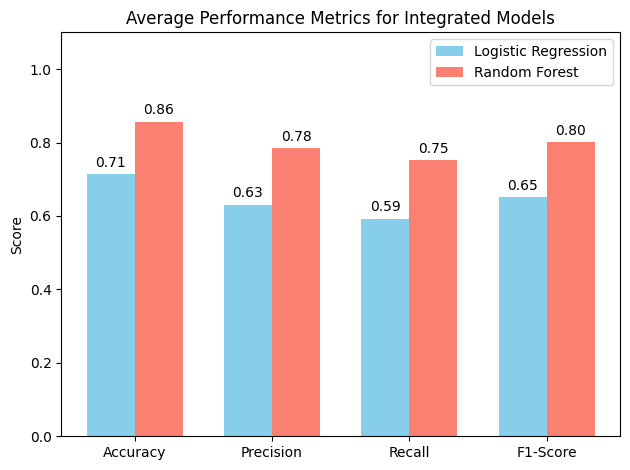

In [ ]:
logreg_acc= (br_logreg_accuracy+an_logreg_accuracy+fd_logreg_accuracy)/3
logreg_prec= (br_logreg_precision_class+an_logreg_precision_class+fd_logreg_precision_class)/3
logreg_recall= (br_logreg_recall_class+an_logreg_recall_class+fd_logreg_recall_class)/3
logreg_f1= (br_logreg_f1_macro+an_logreg_f1_macro+fd_logreg_f1_macro)/3

rndm_acc= (br_rndm_accuracy+an_rndm_accuracy+fd_rndm_accuracy)/3
rndm_prec= (br_rndm_precision_class+an_rndm_precision_class+fd_rndm_precision_class)/3
rndm_recall= (br_rndm_recall_class+an_rndm_recall_class+fd_rndm_recall_class)/3
rndm_f1= (br_rndm_f1_macro+an_rndm_f1_macro+fd_rndm_f1_macro)/3

import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logreg_scores = [logreg_acc, logreg_prec, logreg_recall, logreg_f1]
rndm_scores = [rndm_acc, rndm_prec, rndm_recall, rndm_f1]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, logreg_scores, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, rndm_scores, width, label='Random Forest', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Score')
ax.set_title('Average Performance Metrics for Integrated Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Optionally add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

In [ ]:
food_df

,user_id,food_item,food_type,calories,mood_score,stress_level,order_time,suggested_alternative,nudge_type,responded_to_nudge,...,food_nudge,responded,over_limit,order_hour,calorie_delta,above_limit,mood_stress_gap,is_junk,nudge_type_encoded,food_type_encoded
0,1,Sushi,0,570,8,1,Afternoon,Korean BBQ,0,yes,...,Good choice!,yes,False,14,-1630,False,7,0,0,0
1,2,Burger,2,420,3,3,Morning,Salad,0,no,...,Good choice!,no,False,9,-1580,False,0,0,0,2
2,3,Spring Rolls,2,730,5,3,Afternoon,Salad,0,yes,...,Good choice!,no,False,14,-1270,False,2,0,0,2
3,4,Burger,2,708,2,1,Afternoon,Miso Soup,2,yes,...,Good choice!,yes,False,14,-1692,False,1,0,2,2
4,5,Quinoa Bowl,1,353,9,1,Evening,Dim Sum,2,no,...,Good choice!,no,False,18,-2447,False,8,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Pho,0,489,3,3,Night,Spring Rolls,2,no,...,Good choice!,yes,False,21,-2111,False,0,0,2,0
996,997,Quinoa Bowl,1,374,5,1,Morning,Ramen,2,no,...,Good choice!,yes,False,9,-2226,False,4,0,2,1
997,998,Paneer Tikka,0,355,6,2,Night,Quinoa Bowl,0,no,...,Good choice!,yes,False,21,-1645,False,4,0,0,0
998,999,Quinoa Bowl,1,341,9,1,Evening,Ramen,0,no,...,Good choice!,yes,False,18,-1859,False,8,0,0,1
